

```
# 코드로 형식 지정됨
```

### 테러 사건의 사망자 발생 예측 모델

## Problem Decision

① 자원 부족

전 세계 모든 국가에서 테러에 대응해야 할 자원은 한정적이고
인력, 예산, 장비, 시간 또한 모두 무한하지 않기에, 모든 테러 사건에 동일한 대응은 불가능함.

② 최근 전쟁, 테러의 증가

우크라이나-러시아 전쟁, 인도-파키스탄 분쟁처럼
전쟁과 테러뿐만아니라 민간인 공격이 뒤섞인 다양한 방식의 위협이 늘어나고 있으며,
특히 아프리카 같은 경우, 테러로 인한 사망률이 증가.

③ 우선순의 판단의 필요성

이처럼 사건은 늘어나고 있지만,
모든 사건에 똑같은 수준의 대응은 현실적으로 불가능.
따라서 단순히 테러가 발생했는지를 분석하는 것이 아니라 자원을 효율적으로 관리하기 위하여 우선순위를 결정할 기준이 필요함.

④ 사망자 발생 가능성

테러 사건의 위험성을 판단하는 명확한 기준은 "인명피해로 이어질 가능성이 있는가"임. 단순한 위협, 시위성 공격과 실제로 사람의 생명을 빼앗는 공격 사이에는 우선순위와 대응의 강도를 적절히 분배하는 전략이 필요.

<결론>

하지만 사건이 발생한 직후, 그 테러가 사망자를 발생할 확률이 높은지를 즉각적으로 판단하는 것은 어려움. 그래서 이러한 문제점을 GTD데이터를 사용하여 분석할 것이며, 사건 발생 초기 정보를 활용하여 사망자 발생 가능성을 예측함과 동시에 테러 대응에 관한 의사결정을 하는데에 있어서 도움을 주는 보조적인 역할을 하는 모델을 만들 계획임.

### GTD(Global Terrorism Database)

출처: START (National Consortium for the Study of Terrorism and Responses to Terrorism), University of Maryland

제공 플랫폼: Kaggle

수록 범위: 1970년 ~ 2017년

총 사건 수: 180,000건 이상

분석 단위: 테러 사건

### 데이터 구성

시간 정보	: 사건 연도, 월, 일, 사건 ID

위치 정보	: 국가, 도시, 위도/경도, 지역 코드 등

공격 정보	: 공격 방식, 자살 여부, 무기 종류

피해 규모	: 사망자 수, 부상자 수, 재산 피해

대상 정보	: 공격 대상 유형(정부/군/민간), 국적

가해자 정보	: 테러 조직명, 범행 동기, 주장 여부

기타	:인질 여부, 몸값 요구, 사건 요약, 관련 사건 등


즉,
전 세계에서 발생한 테러 사건을 가장 포괄적으로 담고 있고
사건 발생 직후 확인 가능한 변수들이 다수 포함되어 있으며, 사망자 발생 가능성을 예측하기 위한 정량적 분석에 매우 적합하다고 판단하여 선정함.

## Explanation on Data and Existing Methodologies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/globalterrorismdb_0718dist.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False) #라틴어가 포함되어 있어서 일반적인 UTF-8은 오류 발생

print("행 수와 열 수:", df.shape)
df.head()


행 수와 열 수: (181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


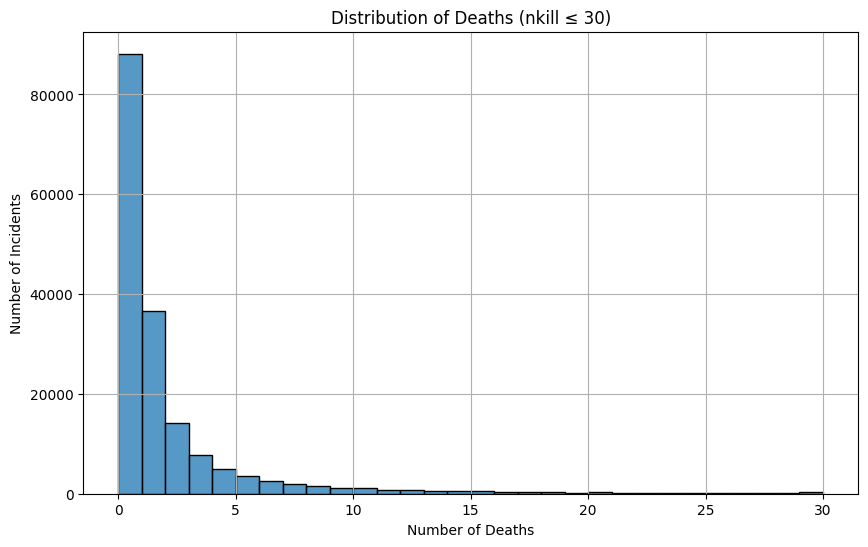

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# nkill 컬럼 존재하는 데이터 필터링
df_nkill = df[df['nkill'].notnull()]

# 사망자 수가 30 이하인 사건만 시각화
plt.figure(figsize=(10,6))
sns.histplot(df_nkill[df_nkill['nkill'] <= 30]['nkill'], bins=30, kde=False)
plt.title('Distribution of Deaths (nkill ≤ 30)')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


전체 테러 사건 중, 테러로 인한 사망자의 수를 분석하기 위하여 시각화를 진행하였음.(30명 초과는 고려하지 않았다.)
차트를 보면 알 수 있듯이 대부분의 사망자 수는 0이 많았다.
다시 말해, 모든 테러가 사망사건으로 이어지지는 않는다는 뜻이라고 유추할 수 있다.
그렇다면 어떤 조건에서 사망자가 발생하는지를 예측할 수 있다면, 대응의 우선순위를 판단하는 데 핵심 기준이 될 수 있다.

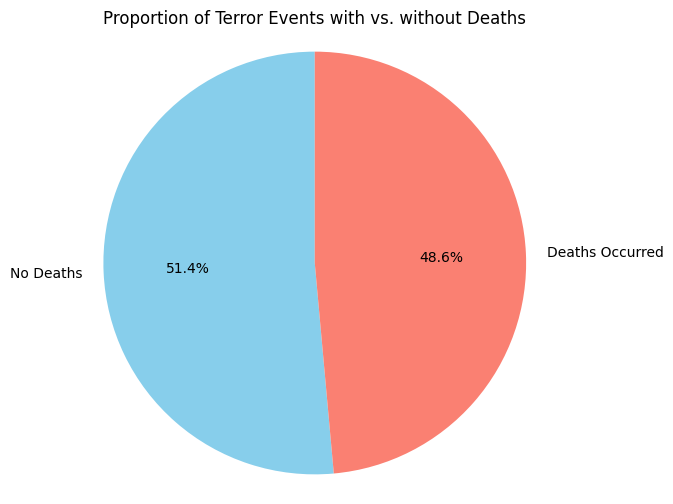

In [ ]:
import matplotlib.pyplot as plt

# nkill이 결측이 아닌 데이터만 필터링
df_valid_nkill = df[df['nkill'].notnull()]

# 사망자 발생 여부 기준으로 분류
death_counts = [
    (df_valid_nkill['nkill'] == 0).sum(),        # 사망자 없음
    (df_valid_nkill['nkill'] > 0).sum()          # 사망자 있음
]

# 라벨 및 색상 정의
labels = ['No Deaths', 'Deaths Occurred']
colors = ['skyblue', 'salmon']

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(death_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Terror Events with vs. without Deaths')
plt.axis('equal')  # 원형 유지
plt.show()


사실 테러라고 생각하면 당연히 사망자가 발생할것이라고 생각하지만 실제 데이터를 확인해본 결과 다른 결과가 나옴. 위의 시각화를 보면 알 수 있듯이 사망자 발생 사건과 아닌 사건의 비율이 반반으로 비슷하게 나오는 것을 확인할 수 있다.

이는 테러의 절반 이상이 인명 피해로 이어지지 않았다는것을 나타내고 단순히 테러가 발생한 여부만으로 사건의 위험성을 판단하는 것은 한계가 존재함. 따라서 자원이 한정된 상황에서 테러 대응의 우선순위를 정하기 위해서는 사망자 발생 가능성이라는 기준이 더욱 중요하다는것을 알 수 있음.



<ipython-input-16-f3451b807a1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['fatal_event'] = df_recent['nkill'].fillna(0).apply(lambda x: 1 if x > 0 else 0)


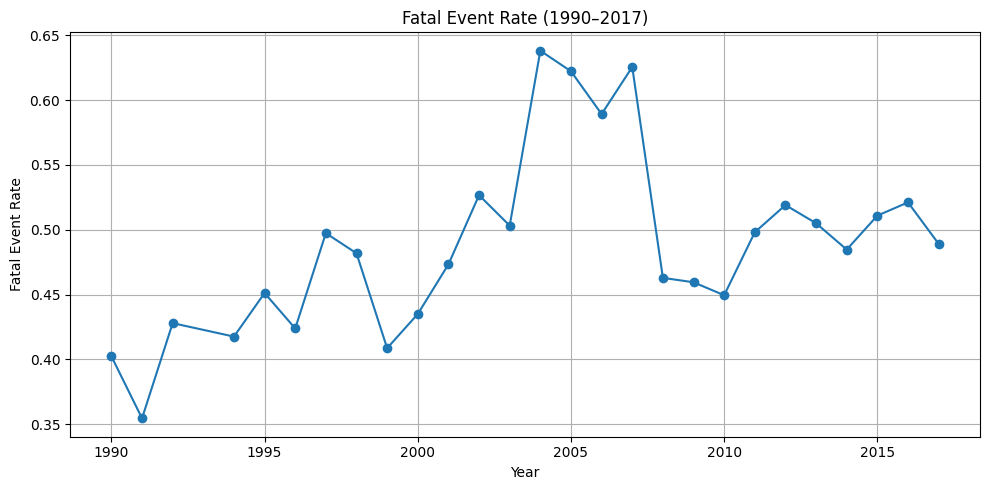

In [ ]:
# 1990년 이후만 필터링
df_recent = df[df['iyear'] >= 1990]
df_recent['fatal_event'] = df_recent['nkill'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

# 연도별 사망자 발생률 계산
yearly_fatal_rate = df_recent.groupby('iyear')['fatal_event'].mean()

# 시각화
plt.figure(figsize=(10,5))
plt.plot(yearly_fatal_rate.index, yearly_fatal_rate.values, marker='o')
plt.title("Fatal Event Rate (1990–2017)")
plt.xlabel("Year")
plt.ylabel("Fatal Event Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


그래프를 보면, 1990년대 초반에는 테러 발생 중 사망자가 발생한 사건의 비율이 약 40% 수준이었으나, 2000년대 중반으로 갈수록 점차 증가해 최대 약 64%까지 상승한다. 이 시기는 이라크 전쟁, 알카에다 등 국제 테러 단체의 활동이 급격히 확대되던 시기와 겹치며, 테러의 치명성이 더욱 높아졌음을 시사한다.

이후 다소 하락하긴 했지만, 여전히 사망자 발생 비율이 절반을 상회하거나 근접한 수준을 유지하고 있다. 이는 단순히 테러가 발생했는지보다, 사망자 발생 가능성에 따른 자원 투입 우선순위를 고려하는 대응이 필요하다는 점을 보여준다.

<ipython-input-17-eafa470d9a11>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_fatal_rate.values, y=attack_fatal_rate.index, palette='coolwarm')


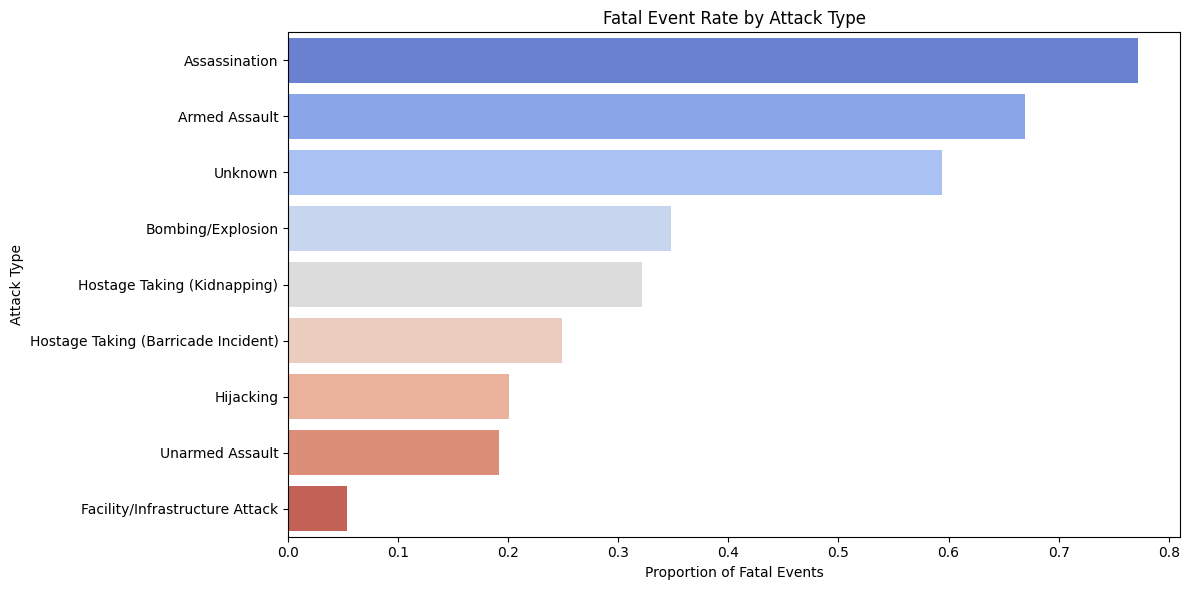

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 사망 여부 컬럼 생성 (사망자 수가 1명 이상이면 True)
df['death_occurred'] = df['nkill'].fillna(0) > 0

# 공격 유형별 사망자 발생 비율 계산
attack_fatal_rate = df.groupby('attacktype1_txt')['death_occurred'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_fatal_rate.values, y=attack_fatal_rate.index, palette='coolwarm')
plt.title("Fatal Event Rate by Attack Type")
plt.xlabel("Proportion of Fatal Events")
plt.ylabel("Attack Type")
plt.tight_layout()
plt.show()


그럼 어떤 공격이 사망자가 가장 발생할 확률이 높을지 분석해 보았다.

시각화 자료에 있듯이 공격 유형에 따라 사망자 발생 비율이 현저하게 다르게 나타나는 것을 볼 수 있다.
암살(Assassination) 유형은 전체 사건 중 약 77%에서 사망자가 발생하며,
무장공격(Armed Assault) 역시 67% 수준으로 매우 높은 치명률을 보인다.

반면, 시설 공격(Facility/Infrastructure Attack)이나 위협 행위(Hijacking/Hostage Taking 미포함) 등은
사망률이 낮은 편에 속해 있다.

이는 단순히 테러가 발생했다고 해서 모두가 인명피해로 이어지는 것은 아니라는 사실을 보여주며,
공격 유형은 테러의 치명성을 판단할 수 있는 강력한 지표로 활용될 수 있음을 시사한다.

그러나 일부 사건은 공격 유형이 Unknown으로 표시되어 있다. 이는 공격 수단이 명확히 파악되지 않았거나, 보도 및 기록이 불완전하여 유형 분류가 어려웠던 사건들을 의미한다. 예를 들어, 테러가 발생했음은 확인되었지만 현장에서 명확한 증거가 없거나 목격자 진술이 부족한 경우 등이 여기에 해당한다.

이러한 Unknown 유형은 해석에 주의가 필요한 항목이다. 왜냐하면 어떤 방식의 공격인지 명확히 알 수 없기에, 다른 유형들과 정확하게 비교하거나 판단 기준으로 삼기엔 어려움이 있기 때문. 그래서 시각화 과정에는 포함하되 분석이나 예측 모델을 만들때는 제외할 예정임.


<ipython-input-18-57dd863df483>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_fatal_rate.values, y=weapon_fatal_rate.index, palette='magma')


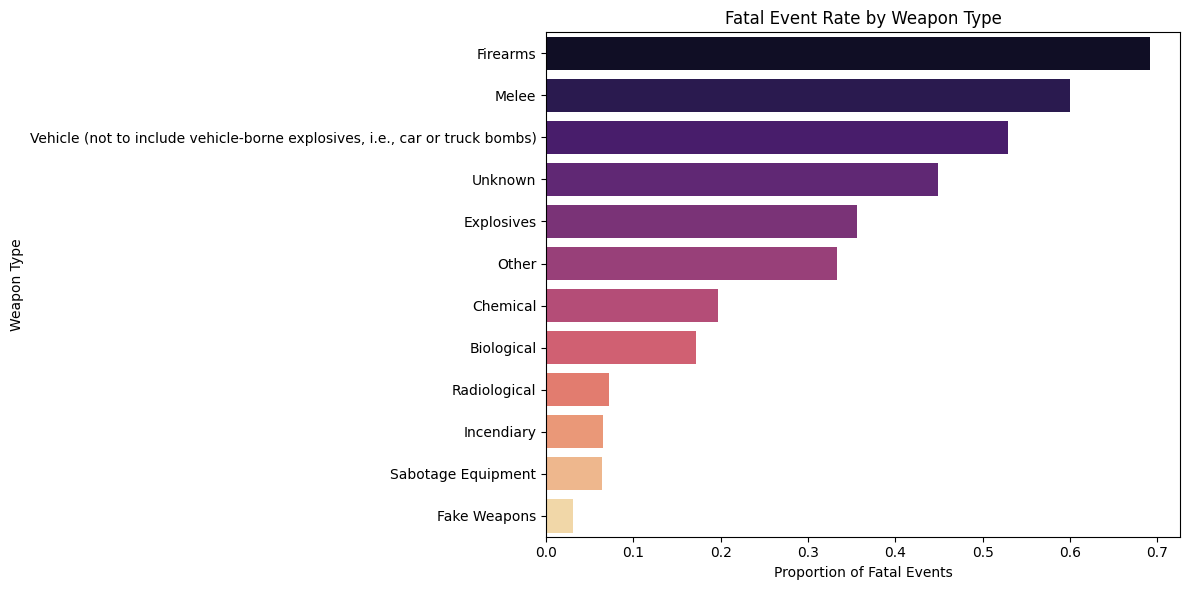

In [ ]:
# 무기 유형별 사망자 발생 비율 계산
df['death_occurred'] = df['nkill'].fillna(0) > 0
weapon_fatal_rate = df.groupby('weaptype1_txt')['death_occurred'].mean().sort_values(ascending=False)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=weapon_fatal_rate.values, y=weapon_fatal_rate.index, palette='magma')
plt.title("Fatal Event Rate by Weapon Type")
plt.xlabel("Proportion of Fatal Events")
plt.ylabel("Weapon Type")
plt.tight_layout()
plt.show()


<ipython-input-19-763bf06d8306>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=other_details.values, y=other_details.index, palette='Reds_r')


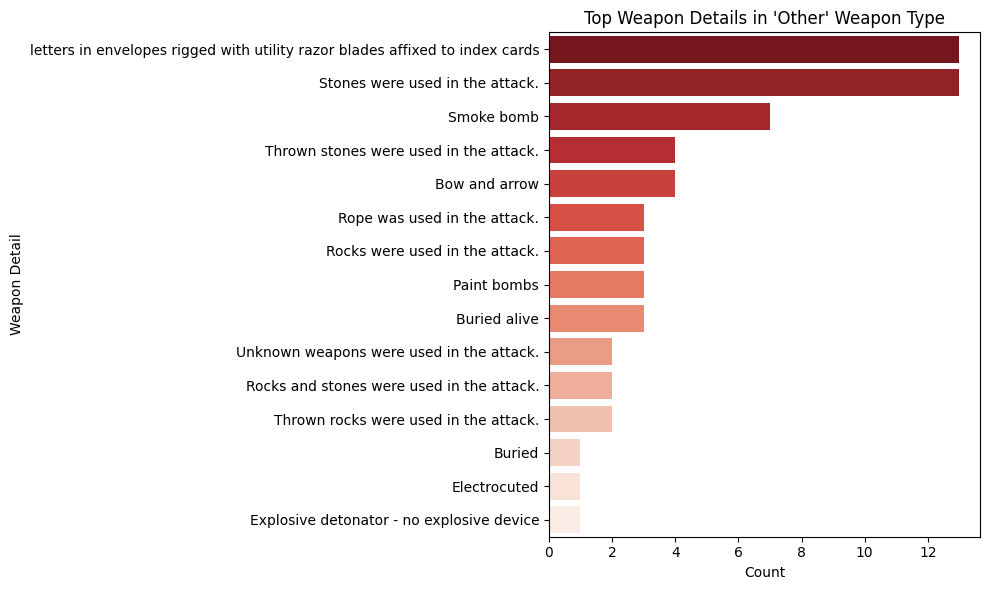

In [ ]:
# Other로 분류된 무기 유형만 필터링
df_other = df[df['weaptype1_txt'] == 'Other']

# 그 안에서 weapdetail의 분포 확인
other_details = df_other['weapdetail'].value_counts().head(15)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=other_details.values, y=other_details.index, palette='Reds_r')
plt.title("Top Weapon Details in 'Other' Weapon Type")
plt.xlabel("Count")
plt.ylabel("Weapon Detail")
plt.tight_layout()
plt.show()


무기 유형별 사망자가 발생하는 사건의 비율을 보면, 총기(Firearms), 근접 무기(Melee), 차량 공격(Vehicle) 등이 사망자를 유발할 가능성이 높은 무기로 나타남. 특히 총기는 가장 자주 사용되었을 뿐만 아니라, 사망자를 발생시킨 비율도 가장 높아 치명성이 매우 높다고 볼 수 있다. 의외로 폭발물(Explosives)은 사망자 발생사건이 많을 줄 알았는데 오히려 상대적으로 사망자 발생 비율이 낮았다. 또한 무기 유형이 불명확하거나 기타로 분류된 공격에서도 상당한 치명적 사건 비율이 나타나 주의가 필요함.

기타(Other) 유형의 세부 무기 정보를 보면 돌, 활, 밧줄, 감전, 연막탄, 생매장 등 일상적이거나 비정형적인 수단이 주로 사용되었음을 알 수 있고, 발생 빈도는 낮지만 특정 조건에서는 매우 위험하거나, 심리적 공포를 유발할 수 있는 수단이 될 수 있다. 즉, 명확한 무기 분류가 어려운 공격이라 하더라도 대응 전략 수립 시 가볍게 봐선 안됨.

<ipython-input-23-e4c4fc54c664>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_fatal.values, y=target_fatal.index, palette='Blues_r')


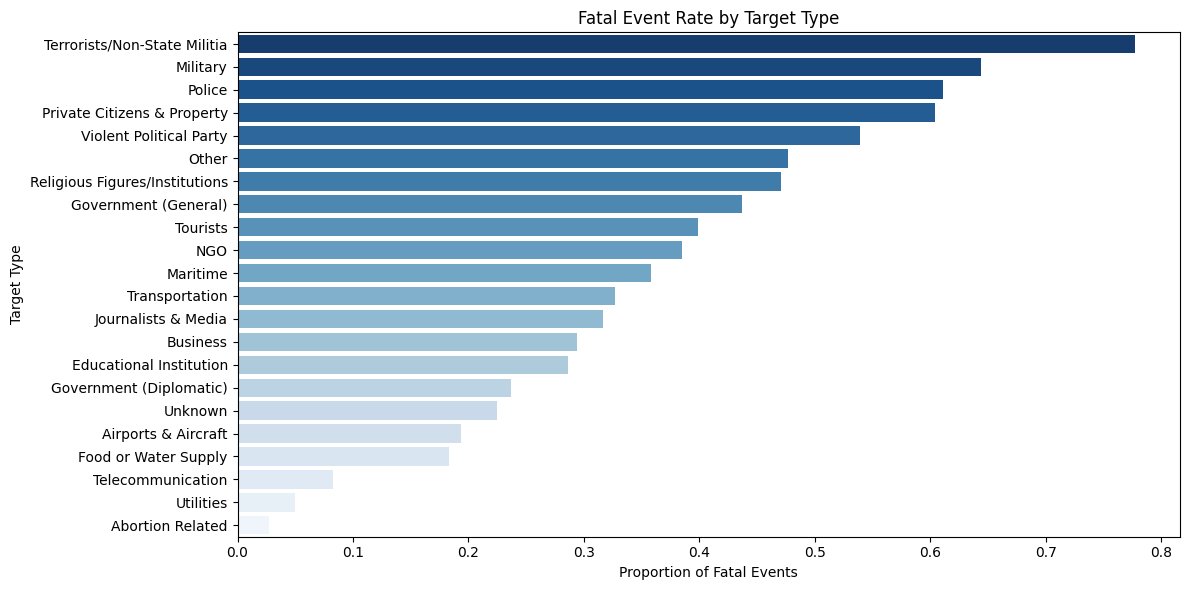

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 사망자 수가 결측이 아닌 데이터만 사용
df_filtered = df[df['nkill'].notnull()]


# 타겟 유형별로 사망자 발생률 계산
target_fatal = df_filtered.groupby('targtype1_txt')['death_occurred'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=target_fatal.values, y=target_fatal.index, palette='Blues_r')


plt.title("Fatal Event Rate by Target Type")
plt.xlabel("Proportion of Fatal Events")
plt.ylabel("Target Type")
plt.tight_layout()
plt.show()


(설명 생략)사망자 발생 가능성은 단순히 공격 유형이 아니라, 어떤 대상을 겨냥했는지에 따라 매우 다르게 나타남.
이에 따라 대응 자원을 배분할 때, 단순 발생 빈도 외에도 공격 대상의 위험성을 반드시 고려해야한다.

<ipython-input-34-ff59bf5c2daf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_rate.values, y=region_rate.index, palette='Blues_r')


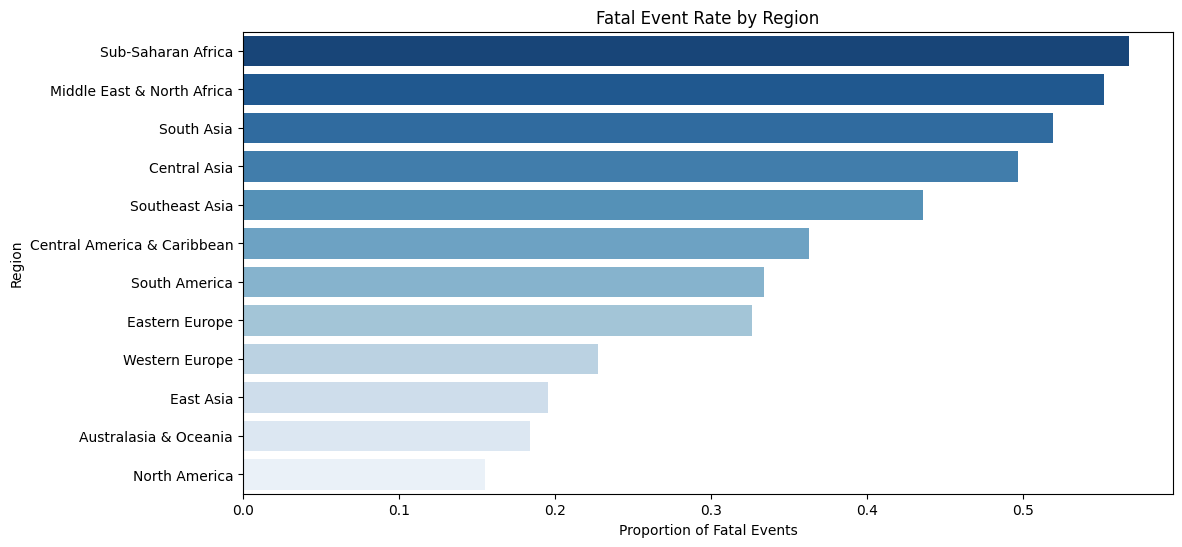

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# region별 death_occurred 비율 계산
region_rate = df.groupby('region_txt')['death_occurred'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=region_rate.values, y=region_rate.index, palette='Blues_r')
plt.title("Fatal Event Rate by Region")
plt.xlabel("Proportion of Fatal Events")
plt.ylabel("Region")
plt.show()


그럼 특정 지역별 사망자 발생률은 어떨지 시각화 해보았다. 순위는 다음과 같으며 다양한 지역에서 많은 사건이 발생하는 것을 확인할 수 있다.

<ipython-input-33-1c24d358eb59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suicide_rate.index, y=suicide_rate.values, palette='Reds')


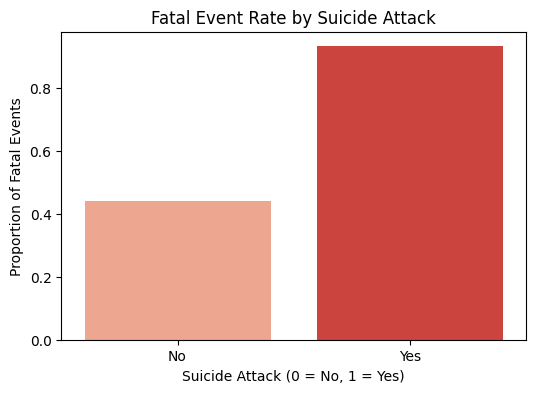

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# suicide 여부에 따른 death_occurred 비율
suicide_rate = df.groupby('suicide')['death_occurred'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=suicide_rate.index, y=suicide_rate.values, palette='Reds')
plt.title("Fatal Event Rate by Suicide Attack")
plt.xlabel("Suicide Attack (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Fatal Events")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


이번엔 자살 공격 성공유무에 따른 사망사건 비율을 분석해본 결과 자살공격을 했을 경우에 거의 90퍼센트에 육박하게 사망자가 발생하였고 그렇지 않더라도 사망자가 거의 50퍼센트 비율로 발생한 것을 알 수 있다. 여기서 알 수 있는 점은 자살공격이 더 위협적이지만 꼭 그런것은 아니라는 인사이트를 얻을 수 있다.

<ipython-input-35-5b8df0ce9dde>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate.index, y=success_rate.values, palette='Greens')


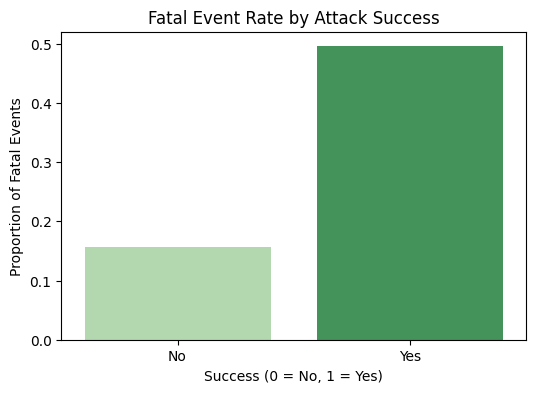

In [ ]:
# success 여부에 따른 death_occurred 비율
success_rate = df.groupby('success')['death_occurred'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='Greens')
plt.title("Fatal Event Rate by Attack Success")
plt.xlabel("Success (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Fatal Events")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


공격 성공 여부에 따른 사망자 발생여부도 판단해보았다. 대부분이 특정 공격에 성공을 하게 되면 사망자가 발생한다는것을 확인할 수 있었으며, 일부는 공격이 실패했음에도 사망자가 발생한 것을 확인할 수 있다.

<ipython-input-36-47118bdc6a5b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multiple_rate.index, y=multiple_rate.values, palette='Purples')


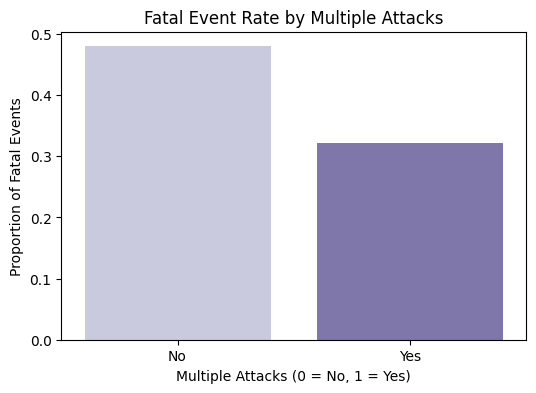

In [ ]:
# multiple 공격 여부에 따른 death_occurred 비율
multiple_rate = df.groupby('multiple')['death_occurred'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=multiple_rate.index, y=multiple_rate.values, palette='Purples')
plt.title("Fatal Event Rate by Multiple Attacks")
plt.xlabel("Multiple Attacks (0 = No, 1 = Yes)")
plt.ylabel("Proportion of Fatal Events")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


마지막으로 공격의 횟수를 분석해보았다, 그 결과 동시 다발적 공격이 단일 공격보다 치명률이 낮은 경향을 보였으며,
이는 동시 공격이 더 많은 장소를 겨냥하되, 개별 공격의 강도가 낮음을 암시한다.

multiple은 모델에서 사망자 예측에 있어 단순한 공격 수보다 공격의 질 또는 집중도를 보조적으로 설명해줄 수 있는 피처로 해석가능할듯

**# Existing Methodologies**

https://www.kaggle.com/code/jmanders/the-happy-pears-predicting-terrorism-casualties/notebook  -테러발생시 사망자의수 예측

https://www.kaggle.com/code/northon/predicting-successfulness-of-terrorist-attacks -테러가 성공할지 예측

그외 방법론들은 GTD 데이터를 시각화하는데에만 초점을 맞춤 ex) 어디서 이만큼의 테러가 발생했다는 식

## Limitations of Existing Methodologies


**기존 방식의 한계**

kaggle에 공개된 자료에 따르면 GTD 데이터 분석 방법론들은 다음과 같은 세 가지 방향으로 제한되는 경우가 많았다.

1. 사건 발생 여부 중심의 대응 판단

일부 방법론은 단순히 "테러가 발생했는가"에 초점을 맞추며, 다양한 피처들을 결합하여 이러한 상황에서 테러가 발생할지 안할지 판단하는 모델을 구현하였다. 실제로는 테러 발생 여부만으로는 그 위험도를 파악하기 어려울 뿐만 아니라 이를 통하여 우선순위를 결정하거나 의사결정에 도움을 주기에는 명확한 한계점이 존재한다고 생각한다.

2. 단순 시각화

거의 대부분의 방법들이 공격 유형, 발생 지역, 무기 종류 등 단일 변수의 분포만을 시각화한 정보만 존재하였다, 즉, 과거에 있었던 사건들을 분석하는데에만 초점을 맞추고 어느년도, 어느국가에서 테러가 많이 일어나는지 등을 분석하는 정도로만 사용되었다, 다시말해, 과거집중적인 분석이 대부분이다. 이러한 분석은 단순 요약에 그칠 뿐, 예측이나 의사결정에 활용하기에는 한계점이 존재한다.

3. 사망자 수 예측

사망자 수를 예측하는 회귀 모델이 시도되었으나, 처음에 시각화에서 보였듯이 전체 사건의 절반 이상이 사망자 수 0명이었고, 사건의 환경적 맥락(예: 건물의 유형, 인구 밀도, 날씨 등)이 포함되어 있지 않기 때문에 정확한 수치 예측은 불가능에 가까우며 실용성이 떨어진다.

**공통된 한계점**

현실에서는 동시에 여러 테러가 발생할 수 있으며, 모든 사건에 자원을 일괄 투입하는 것은 불가능함.

또한, 사망 확률이 높은 사건을 놓친다면, 자원을 효율적으로 배분하지 못하고 치명적인 피해를 유발할 수 있음.

따라서 정확한 사망자 수, 테러 발생 여부 보다는, 사망자 발생 여부가 의사결정에 훨씬 더 중요한 정보라고 할 수 있다.

## Proposed Improvements (Introduction of suggested model)

모델에 관한 설명이랑 왜 이 모델들을 썼는지에 대한 설명 작성

수업에서 Random Forest랑 Logistic Regression에 관하여 자세히는 아니지만 나온적이 있어서 두 모델을 사용해봤습니다.

XGBoost는 앙상블 모델로 높은 예측 정확도와 과적합 방지 기능, 빠른 학습 속도로 인해 실무에서 널리 사용되는 모델이여서 선정했습니다.

Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 사용할 피처 선택
# 'nperps', 'nperpcap','ishostkid' - ㅈㅔ외
selected_columns = [
    'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt',
    'suicide', 'success', 'region_txt', 'multiple', 'death_occurred'
]

df_model = df[selected_columns].copy()

# 결측값 처리
df_model = df_model.dropna(subset=['death_occurred'])  # 타겟이 없는 행 제거
df_model = df_model.fillna(0)  # 나머지 결측치는 0으로 대체

# 범주형 변수 라벨 인코딩
categorical_cols = ['attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'region_txt']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le

# 피처/레이블 분리
X = df_model.drop('death_occurred', axis=1)
y = df_model['death_occurred']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # train 80%, test 20%

# Random Forest 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[15169  4524]
 [ 3446 13200]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.77      0.79     19693
        True       0.74      0.79      0.77     16646

    accuracy                           0.78     36339
   macro avg       0.78      0.78      0.78     36339
weighted avg       0.78      0.78      0.78     36339





    'attacktype1_txt',  # 공격 유형

    'weaptype1_txt',    # 사용 무기

    'targtype1_txt',    # 대상 유형

    'suicide',          # 자살공격 여부

    'success',          # 공격 성공 여부

    'region_txt',       # 지역

    'multiple',         # 동시 사건 여부
    
    'death_occurred'    # 사망 발생 (라벨)


XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# 모델 정의
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:18:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix (XGBoost):
[[15257  4436]
 [ 3524 13122]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

       False       0.81      0.77      0.79     19693
        True       0.75      0.79      0.77     16646

    accuracy                           0.78     36339
   macro avg       0.78      0.78      0.78     36339
weighted avg       0.78      0.78      0.78     36339



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 정의
logreg = LogisticRegression(max_iter=1000)

# 학습
logreg.fit(X_train, y_train)

# 예측
y_pred_logreg = logreg.predict(X_test)

# 평가
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))


Confusion Matrix (Logistic Regression):
[[15767  3926]
 [ 7069  9577]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.69      0.80      0.74     19693
        True       0.71      0.58      0.64     16646

    accuracy                           0.70     36339
   macro avg       0.70      0.69      0.69     36339
weighted avg       0.70      0.70      0.69     36339



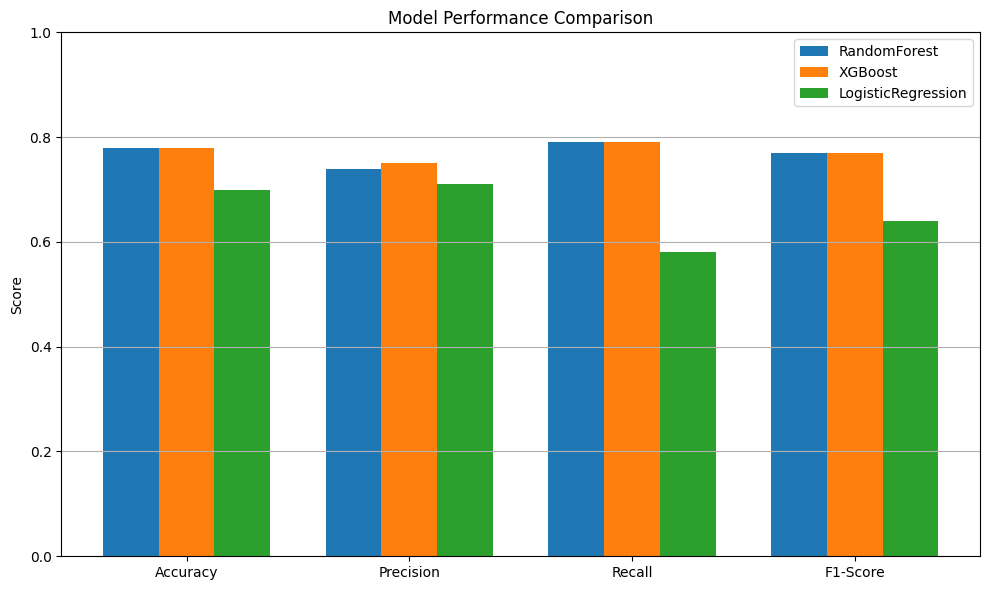

In [ ]:
import matplotlib.pyplot as plt

# 모델 이름과 지표
models = ['RandomForest', 'XGBoost', 'LogisticRegression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# 실제 성능 값
rf_scores = [0.78, 0.74, 0.79, 0.77]
xgb_scores = [0.78, 0.75, 0.79, 0.77]
logreg_scores = [0.70, 0.71, 0.58, 0.64]

# 하나로 묶기
values = [rf_scores, xgb_scores, logreg_scores]

# 시각화
x = range(len(metrics))
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width for i in x], values[0], width=bar_width, label='RandomForest')
plt.bar(x, values[1], width=bar_width, label='XGBoost')
plt.bar([i + bar_width for i in x], values[2], width=bar_width, label='LogisticRegression')

plt.xticks(x, metrics)
plt.ylim(0, 1.0)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Analysis and Results

GTD(Global Terrorism Database)의 실제 테러 사건 데이터를 기반으로,
사망자 발생 여부(0 또는 1)를 예측하는 이진 분류 모델을 구축하였다.
총 8개의 주요 피처(공격 유형, 무기 유형, 타겟 유형, 자살 여부 등)를 사용하였으며,
이러한 변수들을 통해 단순히 테러가 발생하는지가 아니라, 얼마나 위험한 사건인지를 판단하는 데 초점을 맞추고 그에 따른 우선순위를 선정하여 한정된 자원에서 효율적인 의사결정을 하기 위해 돕는 보조적인 역할을 하는 모델을 구현하였다. 총 3개의 모델에게 각각의 데이터셋을 학습시키고 테스트를 진행하였으며 그중 가장 성능이 높은 모델 하나를 선별하였다.



Random Forest
정확도: 0.78

사망자 발생 가능성이 낮은 경우: Precision=0.81, Recall=0.77, F1-score=0.79

사망자 발생 가능성이 높은 경우: Precision=0.74, Recall=0.79, F1-score=0.77



---


Logistic Regression
정확도: 0.70

사망자 발생 가능성이 낮은 경우: Precision=0.69, Recall=0.80, F1-score=0.74

사망자 발생 가능성이 높은 경우: Precision=0.71, Recall=0.58, F1-score=0.64


---


XGBoost
정확도: 0.78

사망자 발생 가능성이 낮은 경우: Precision=0.81, Recall=0.77, F1-score=0.79

사망자 발생 가능성이 높은 경우: Precision=0.75, Recall=0.79, F1-score=0.77

<최종 모델 선정>

모델들 모두 전체적으로 비슷한 성능이 나왔다. 하지만 XGBoost가 사망자 발생 가능성이 높은 사건을 예측할 때 precision 0.75로 미세하게 높은 성능을 보였기에 최종모델로 선정.

약 80%의 성능으로 매우 높은 성능은 아니지만 준수한 성능으로 의사결정에 있어서 도움이 될 가능성이 높음

In [ ]:
import pandas as pd
import numpy as np

# 확률 예측
probas = xgb_model.predict_proba(X_test)

# 사망자 발생 확률만 추출
death_probs = probas[:, 1]  # 두 번째 열이 '1' 클래스 확률

# 확률을 데이터프레임으로 정리
result_df = X_test.copy()
result_df['death_prob'] = death_probs
result_df['true_label'] = y_test.values
result_df['pred_label'] = y_pred_xgb

# 가장 높은 확률과 가장 낮은 확률 찾기
highest_risk = result_df.sort_values(by='death_prob', ascending=False).head(1)
lowest_risk = result_df.sort_values(by='death_prob', ascending=True).head(1)

print("사망자 발생 확률이 가장 높은 사건:")
print(highest_risk)

print("\n사망자 발생 확률이 가장 낮은 사건:")
print(lowest_risk)


사망자 발생 확률이 가장 높은 사건:
       attacktype1_txt  weaptype1_txt  targtype1_txt  suicide  success  \
82242                2              2              2        1        1   

       region_txt  multiple  death_prob  true_label  pred_label  
82242           8       0.0    0.999057        True           1  

사망자 발생 확률이 가장 낮은 사건:
       attacktype1_txt  weaptype1_txt  targtype1_txt  suicide  success  \
70729                3              5              3        0        1   

       region_txt  multiple  death_prob  true_label  pred_label  
70729          11       1.0    0.000202       False           0  


그럼 어떤 사건들이 사망자가 발생하거나 비교적 안전할지 XGBoost를 사용하여 분석해보았다.

모델이 예측한 수많은 사건 중, 사망자 발생 확률이 가장 높았던 사건과 낮은 사건은 다음과 같은 특성을 갖고 있다.

암살을 목적으로 한 테러였고, 총기류를 사용했으며, 정부를 대상으로 한 공격이다.
또한 중동 및 북아프리카 지역에서 발생했으며, 자살 공격 형태였고, 공격은 성공적으로 마무리된것으로 확인되었다.

모델은 이 사건의 사망자 발생 확률을 99.9%로 예측했으며, 실제로도 사망자가 발생한 사건인것을 확인할 수 있다.

이처럼 자살 공격 + 총기 사용 + 정부 대상 + 중동 지역이라는 요소가 결합되면, 사망 가능성이 극도로 높아진다는 점을 보여주는 대표적인 사례


---



반대로, 사망자 발생 확률이 가장 낮다고 예측된 사건은 무장 공격 유형이었고, 폭발물을 사용했으며, 경찰을 목표로 한 테러였다.
사하라 이남 아프리카 지역에서 발생했으며, 자살 공격은 아니었고, 여러 장소에서 동시다발적으로 발생한 공격이었다.

모델은 이 사건의 사망자 발생 확률을 0.02%로 예측했고, 실제로도 사망자는 발생하지 않은것을 확인할 수 있다.

즉, 무기 종류나 공격 성공 여부만으로는 치명도를 판단하기 어렵고, 복합적인 요인들의 결합이 중요하다는 점을 시사

## Implications

이번 프로젝트는 단순히 테러의 발생 여부가 아닌, 사망자 발생 가능성이 높은 테러 사건을 사전에 식별하는 데 초점을 맞추어보았다. 그 결과, 특정 공격 유형이나 무기 종류,  등의 다양한 피처들을 종합적으로 고려한 XGBoost 모델이 가장 우수한 성능을 보이며, 정량적 기준에 따른 위험도 판단이 가능하다는 것을 보여줬다.

이는 실제 테러 대응 현장에서 다음과 같은 의사결정 개선에 기여할 수 있을것이라고 생각한다.

① 자원 배분의 우선순위 설정

모든 사건에 동일한 자원을 투입하는 것은 비효율적이기에, 본 모델은 사망자 발생 가능성이 높은 사건을 식별함으로써, 한정된 인력과 자원을 더 시급하고 치명적인 사건에 우선적으로 투입할 수 있게 도와줄 수 있다.

② 실시간 대응 시스템과의 접목 가능성

테러 발생 직후 수집되는 정보(공격 유형, 지역, 무기, 인질 여부 등)를 기반으로 빠르게 사건의 심각도를 판단할 수 있으므로, 향후 실시간 대응 시스템에 통합되어 사용될 가능성이 존재한다.

③ 기존 단일 변수 의존의 한계 극복

과거에는 지역이나 무기 종류 등 하나의 변수에 의존한 대응 전략이 주를 이뤘지만, 본 연구는 여러 요인의 복합적인 상관관계를 반영하여 판단의 정확도와 신뢰도를 높일 수 있음을 보여줌.

④ 의사결정의 정량화 및 데이터 기반 판단 유도

테러 대응 과정에서 감이나 경험에 의존하던 판단 방식 대신, 객관적인 지표와 모델에 근거한 의사결정이 가능해짐으로써 대응의 일관성과 신뢰성을 높일 수 있다고 생각한다.

Limitations (한계점)
1. 데이터 기반 예측의 한계

본 모델은 1970년부터 2017년까지의 데이터를 기반으로 학습되었기 때문에, 현재의 정세나 테러 수법의 변화를 충분히 반영하지 못할 수 있다.
→ 향후에는 최신 데이터(2018~2024)를 반영하거나 실시간 데이터 연계를 통해 개선.

2. 피처 선택의 한정성

전체 GTD 데이터는 180,000건 이상의 방대한 사건과 100개 이상의 다양한 피처로 구성되어 있으나, 본 프로젝트에서는 사망자 발생 가능성과 직접적인 연관성이 높다고 판단되는 주요 변수만을 선정하여 모델 학습에 사용함.
이에 따라 모델이 학습하지 못한 잠재적 요인이 반영되지 않았을 수 있다.
→ 향후에는 피처 확장이나 다양한 기법을 통해 예측 성능을 더욱 향상시킬 수 있을것이라 생각.


3. 실전 적용 시 참고 도구로서의 한계

본 모델은 사건 발생 직후 수집 가능한 정보를 기반으로 설계되어, 빠른 의사결정을 지원하는 데 유용하나 모든 테러 사건의 특성과 맥락을 완전히 반영하기는 어렵기 때문에, 현장의 정성적 판단이나 추가 정보와 함께 보조적으로 활용되어야 한다.
→ 향후에는 다양한 상황과 맥락을 반영할 수 있도록 다층적인 분석 체계의 일부로 통합하는 방향이 바람직하다.